# Pymaceuticals Inc.
---

### Analysis

- From what we can see here it seems that Mice that received the Infubinol treatment regimen had larger tumor volumes overall when compared to the other regiments. On the other end of the spectrum the Ramicane treatment had the lowest overall tumor volumes when compared to the others. Additionally it would seem that across the board larger mice more often than not had larger tumors than their smaller counter parts and no mice were able to get rid of their tumors in their entirety. The most innefective method has to be Infubinol, not only were the results less desirable they also seemed to have an outlier which may lead us to believe that they are a bit unpredictable as well. Similarly to Ramicane Capomulin also performed well in reducing the size of the tumors. The tests conducted had appropriate sample sizes between the males and the females with a 51% Male vs 49% female spread. Given the results I would say that Capomulin and Ramicane are the most reliable with Ramicane being the best we can see here. 
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import scipy.stats as st
#Imported more files based on a recommendation a friend made
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge = pd.merge(mouse_metadata,study_results, how="inner", on="Mouse ID")

# Display the data table for preview
merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
MCount = merge["Mouse ID"].count()
MCount

1893

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Dupes = merge[merge.duplicated(["Mouse ID","Timepoint"])]
Dupes

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Clean = merge[merge["Mouse ID"] != 'g989']
Clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
UniqueMice = Clean["Mouse ID"].unique()
Count = len(UniqueMice)
Count

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = Clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean().map('{:2f}'.format)
median = Clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].median().map('{:.2f}'.format)
var = Clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].var().map('{:.2f}'.format)
std = Clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].std().map('{:.2f}'.format)
sem = Clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem().map('{:.2f}'.format)

summary = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median, "Tumor Volume Variance": var, "Tumor Volume Std. Dev": std,"Tumor Volume Sem": sem})
summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.56,24.95,4.99,0.33
Ceftamin,52.591172,51.78,39.29,6.27,0.47
Infubinol,52.884795,51.82,43.13,6.57,0.49
Ketapril,55.235638,53.70,68.55,8.28,0.60
Naftisol,54.331565,52.51,66.17,8.13,0.60
Placebo,54.033581,52.29,61.17,7.82,0.58
Propriva,52.320930,50.45,43.85,6.62,0.54
Ramicane,40.216745,40.67,23.49,4.85,0.32
Stelasyn,54.233149,52.43,59.45,7.71,0.57


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

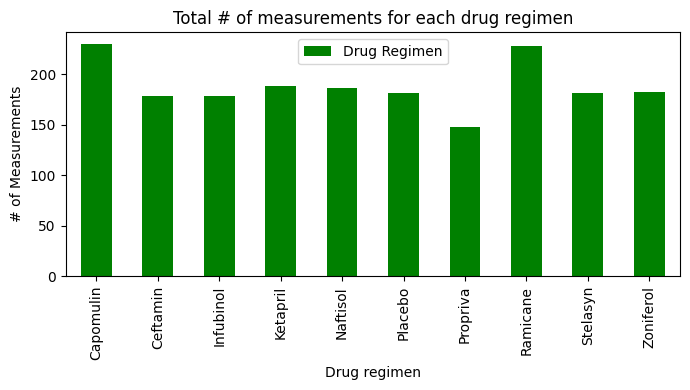

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
DrugReg = Clean.groupby("Drug Regimen")
DCount = pd.DataFrame(DrugReg["Drug Regimen"].count())
drugStat = DCount.plot(kind = 'bar', color="green", figsize=(7,4))
plt.title("Total # of measurements for each drug regimen")
plt.xlabel("Drug regimen")
plt.ylabel("# of Measurements")
plt.tight_layout()
plt.show()

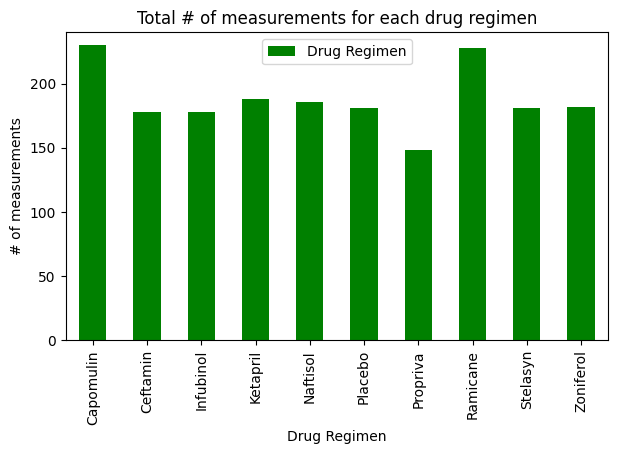

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(DCount))
tick = [value for value in x_axis]
plt.figure(figsize=(7,4))
plt.bar(x_axis,DCount["Drug Regimen"], color ='g',alpha=1,align = "center",width=0.5)
plt.xticks(tick,list(DCount.index),rotation='vertical')
plt.xlim(-0.5,len(x_axis)-0.5)
plt.ylim(0,max(DCount["Drug Regimen"])+10)
plt.title("Total # of measurements for each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of measurements")
Reg = ["Drug Regimen"]
plt.legend(Reg,loc="best")
plt.tight_layout
plt.show()


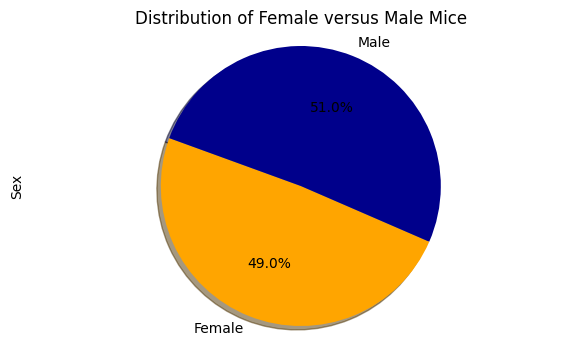

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Ggender = Clean.groupby('Sex')
Cgender = pd.DataFrame(Ggender['Sex'].count())
Cgender.plot(kind='pie',figsize=(7,4),y='Sex',title="Distribution of Female versus Male Mice",startangle=160,autopct='%1.1f%%',shadow=True,colors=["orange","darkblue"],legend=False)
plt.axis('equal')
plt.show()

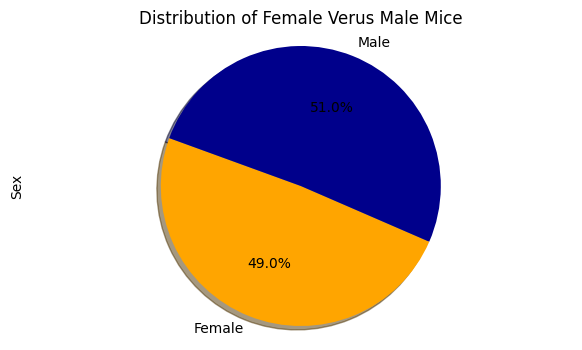

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Lgender = list(Cgender.index.values)
Vgender = Cgender['Sex']
colors = ["orange", "darkblue"]

plt.figure(figsize=(7,4))
plt.pie(Vgender,labels=Lgender,colors=colors,startangle=160, autopct='%1.1f%%',shadow=True)
plt.title("Distribution of Female Verus Male Mice")
plt.ylabel("Sex")
plt.axis('equal')
plt.show()


## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Greatest = Clean.groupby("Mouse ID")["Timepoint"].max()
GreatestFrame = Greatest.reset_index()
GreatestFrame

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
MaxMerge = pd.merge(GreatestFrame,Clean,how="left",on=['Mouse ID','Timepoint'])
MaxMerge.head(10)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
5,a401,45,Zoniferol,Female,8,25,66.794156,4
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
8,a457,10,Ketapril,Female,11,30,49.783419,0
9,a492,45,Stelasyn,Male,20,25,60.122011,1


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorVolumeData=[]

for treatment in treatments:
    tumorVolumes = MaxMerge.loc[MaxMerge["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    tumorVolumeData.append(tumorVolumes)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumorVolumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"----------------------------")
    print(f"Results for {treatment} treatment:")
    print(f"The lower quartile of tumor volume is: {lowerq}")
    print(f"The upper quartile of tumor volume is: {upperq}")
    print(f"The interquartile range of tumor volume is: {iqr}")
    print(f"The median of tumor volume is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers")
    print(f"Values above {upper_bound} could be outliers")

    tumorOutliers = tumorVolumes.loc[(tumorVolumes < lower_bound) | (tumorVolumes > upper_bound)]
    print(f"{treatment}'s tumor outliers: {tumorOutliers}")
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


----------------------------
Results for Capomulin treatment:
The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The median of tumor volume is: 38.1251644 
Values below 20.70456164999999 could be outliers
Values above 51.83201549 could be outliers
Capomulin's tumor outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
----------------------------
Results for Ramicane treatment:
The lower quartile of tumor volume is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.098536719999998
The median of tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers
Values above 54.30681135 could be outliers
Ramicane's tumor outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
----------------------------
Results for Infubinol treatment:
The lower quartile of tumor volume is: 54.04860769
The 

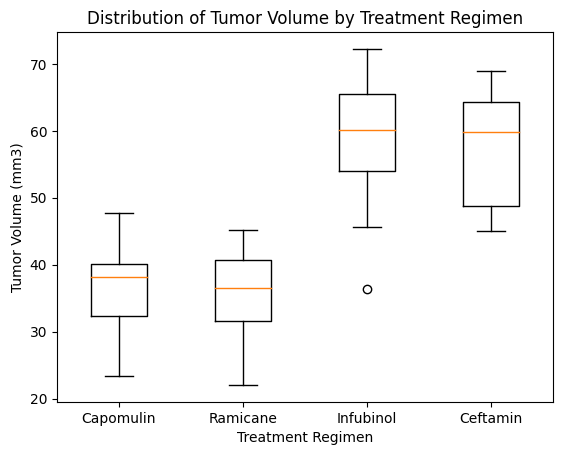

In [24]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumorVolumeData = []

for treatment in treatments:
    tumorVolumes = MaxMerge.loc[MaxMerge["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    tumorVolumeData.append(tumorVolumes)
fig, ax = plt.subplots()

ax.boxplot(tumorVolumeData, labels=treatments)

ax.set_title('Distribution of Tumor Volume by Treatment Regimen')
ax.set_xlabel('Treatment Regimen')
ax.set_ylabel('Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

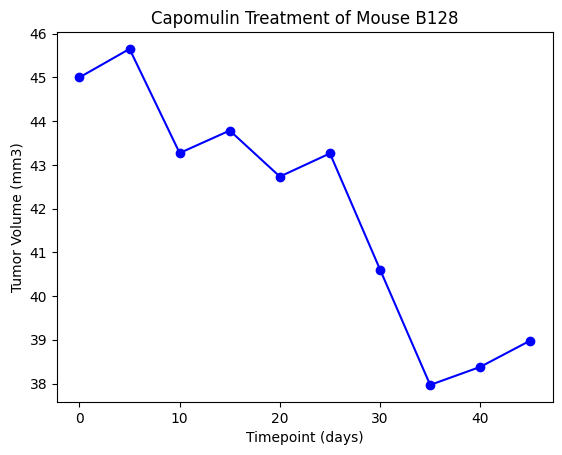

In [25]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
treatment = "Capomulin"
mouse_id = "b128"

filter = Clean.loc[(Clean["Drug Regimen"] == treatment) & (Clean["Mouse ID"] == mouse_id)]

TimeX = filter["Timepoint"]
tumorVolumes = filter["Tumor Volume (mm3)"]

plt.plot(TimeX,tumorVolumes,marker="o",color="blue")

plt.title("Capomulin Treatment of Mouse B128")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

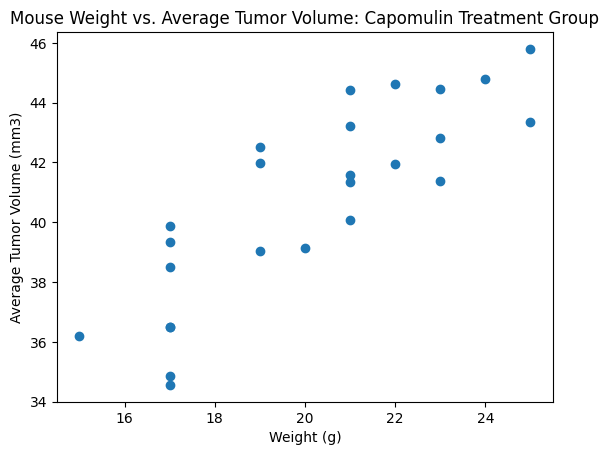

In [26]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = Clean[Clean["Drug Regimen"] == "Capomulin"]
avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()
x_values = mouse_weight
y_values = avg_tumor_volume
plt.scatter(x_values,y_values)
plt.title("Mouse Weight vs. Average Tumor Volume: Capomulin Treatment Group")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The Correlation between mouse wiehgt and the average tumor volume is 0.84


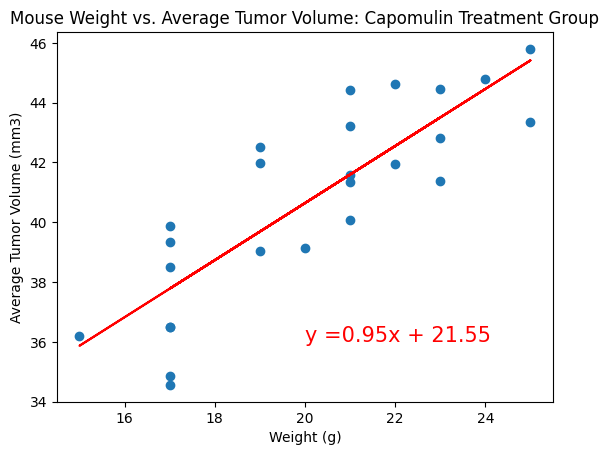

In [28]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
print(f"The Correlation between mouse wiehgt and the average tumor volume is {round(st.pearsonr(mouse_weight,avg_tumor_volume)[0],2)}")

x_values = mouse_weight
y_values = avg_tumor_volume

(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.title('Mouse Weight vs. Average Tumor Volume: Capomulin Treatment Group')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

